In [1]:
import os
import time
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
train_data = pd.read_csv('iris.csv')
train_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: >

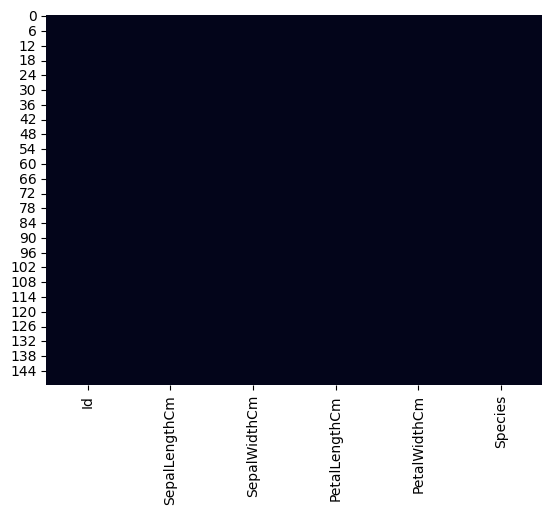

In [12]:
sns.heatmap(train_data.isnull(), cbar=False)

C:\Users\vasiliev\miniconda3\envs\garda\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


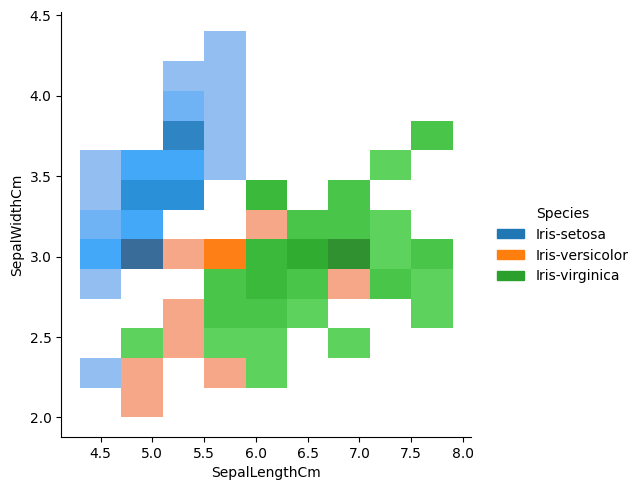

In [13]:
sns.displot(data=train_data, x='SepalLengthCm', y='SepalWidthCm', hue="Species")

In [5]:
train_data.drop(['Id'], inplace=True, axis=1)

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

train_data["Species"] = label_encoder.fit_transform(train_data["Species"])

train_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

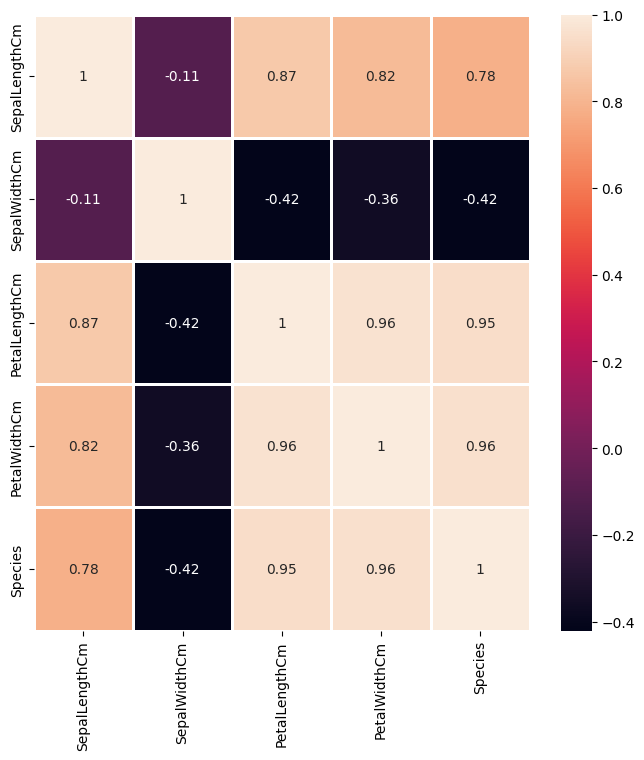

In [7]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(train_data.corr(), annot=True, linewidths=1, ax=ax)

In [8]:
target = train_data['Species']
train_data.drop(['Species'], inplace=True, axis=1)

X_train, X_test, y_train, y_test = train_test_split(train_data, target, test_size=0.25, random_state=42, shuffle=False)
print(f'Sizes: X_train={X_train.shape}, y_train={y_train.shape}, X_test={X_test.shape}, y_test={y_test.shape}')

Sizes: X_train=(112, 4), y_train=(112,), X_test=(38, 4), y_test=(38,)


In [9]:
from xgboost import XGBClassifier

xgboost_model = XGBClassifier()
xgboost_model.fit(X_train, y_train)
y_preds_xgboost = xgboost_model.predict(X_test)

accuracy = accuracy_score(y_test, y_preds_xgboost)

print('Accuracy', accuracy)

Accuracy 0.7631578947368421
